In [1]:
import pandas as pd

from sdm_bio.utils.data import generate_model_data
from sdm_bio import pipe_evaluate_clf, evaluate_clf
import sdm_bio

In [2]:
X, y = generate_model_data("../../data/26-05-2024-1505/features.parquet", verbose=True)

#df = pd.read_parquet("../../data/26-05-2024-1505_features.parquet")
#df = df.dropna()


        Removed columns: ['altitude_br', 'BIOVAR11', 'BIOVAR8', 'BIOVAR15', 'BIOVAR12', 'BIOVAR19', 'BIOVAR16', 'BIOVAR10', 'BIOVAR6', 'BIOVAR14', 'BIOVAR17', 'BIOVAR5', 'BIOVAR18', 'BIOVAR9', 'BIOVAR4']
        


In [3]:
X

,BIOVAR1,BIOVAR2,BIOVAR3,BIOVAR7,BIOVAR13,Cultivated_and_Managed_Vegetation,Deciduous_Broadleaf_Trees,Evergreen_Broadleaf_Trees,Herbaceous_Vegetation,Mixed_Other_Trees,Open_Water,Regularly_Flooded_Vegetation,Shrubs,vegetacao_ibge1992_br,solos2001_br,sa2001tree_br,exposicao_br,density3_br,declividade_br
0,13.945833,12.091666,60.157547,20.100000,336.0,0.0,21.0,72.0,0.0,0.0,0.0,0.0,7.0,40.0,100.0,71.0,200.836975,8.983000,26.522350
1,14.158333,11.900000,51.965065,22.900000,315.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,33.0,21.0,100.0,42.0,284.565765,15.061000,3.481259
3,17.004168,8.791667,50.818886,17.299999,177.0,0.0,7.0,93.0,0.0,0.0,0.0,0.0,0.0,40.0,513.0,58.0,282.817383,10.705700,20.968769
4,15.404167,10.175000,54.411762,18.700001,153.0,24.0,21.0,0.0,36.0,0.0,0.0,0.0,19.0,5.0,513.0,50.0,320.314545,32.986000,10.612040
6,13.616667,11.733333,50.574711,23.200001,324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,21.0,100.0,67.0,141.495804,9.186400,2.877920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17842,23.929167,10.508333,64.866257,16.199999,172.0,68.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,21.0,305.0,19.0,358.919067,17.561199,1.580837
17843,23.333334,9.566667,62.527229,15.300001,176.0,51.0,0.0,21.0,0.0,29.0,0.0,0.0,0.0,24.0,305.0,67.0,186.340195,30.202400,2.825982
17844,23.500000,9.500000,62.091507,15.299999,178.0,47.0,0.0,5.0,0.0,45.0,0.0,0.0,3.0,24.0,305.0,72.0,177.709396,29.836901,1.164106
17845,23.658333,9.833333,62.236290,15.799999,184.0,68.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,21.0,305.0,7.0,258.690063,13.620800,2.811064


In [3]:
paths = [
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_1.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_2.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_3.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_4.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_5.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_6.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_7.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_8.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_9.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_10.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_11.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_12.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_13.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_14.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_15.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_16.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_17.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_18.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_19.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Cultivated_and_Managed_Vegetation.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Deciduous_Broadleaf_Trees.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Evergreen_Broadleaf_Trees.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Herbaceous_Vegetation.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Mixed_Other_Trees.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Open_Water.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Regularly_Flooded_Vegetation.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Shrubs.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/vegetacao_ibge1992_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/solos2001_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/sa2001tree_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/exposicao_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/density3_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/declividade_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/altitude_br.tif'
]
columns = [
    'BIOVAR1',
    'BIOVAR2',
    'BIOVAR3',
    'BIOVAR4',
    'BIOVAR5',
    'BIOVAR6',
    'BIOVAR7',
    'BIOVAR8',
    'BIOVAR9',
    'BIOVAR10',
    'BIOVAR11',
    'BIOVAR12',
    'BIOVAR13',
    'BIOVAR14',
    'BIOVAR15',
    'BIOVAR16',
    'BIOVAR17',
    'BIOVAR18',
    'BIOVAR19',
    'Cultivated_and_Managed_Vegetation',
    'Deciduous_Broadleaf_Trees',
    'Evergreen_Broadleaf_Trees',
    'Herbaceous_Vegetation',
    'Mixed_Other_Trees',
    'Open_Water',
    'Regularly_Flooded_Vegetation',
    'Shrubs',
    'vegetacao_ibge1992_br',
    'solos2001_br',
    'sa2001tree_br',
    'exposicao_br',
    'density3_br',
    'declividade_br',
    'altitude_br',
    'Presence'
]

tiff_files = []
for p, col in zip(paths, columns):
    if col in X.columns:
        tiff_files.append(p)

In [4]:
# ML 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression 
import os


In [5]:
CLASS_MAP = {
    'RF': (RandomForestClassifier()), 
    'ET': (ExtraTreesClassifier()), 
    'ADA' : (AdaBoostClassifier()), 
    'BAG' : (BaggingClassifier()), 
    'GRA' : (GradientBoostingClassifier()), 
    'XGB': (XGBClassifier()), 
    'LGBM': (LGBMClassifier()), 
    'Maxent':(LogisticRegression()), 
    }

RF
RF 5-fold Cross Validation Accuracy: 95.06 (+/- 1.24)

Accuracy Score: 0.96

Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2519
           1       0.91      0.51      0.66       184

    accuracy                           0.96      2703
   macro avg       0.94      0.75      0.82      2703
weighted avg       0.96      0.96      0.96      2703


Confusion matrix
[[2510    9]
 [  90   94]]

AUC(ROC): 0.75



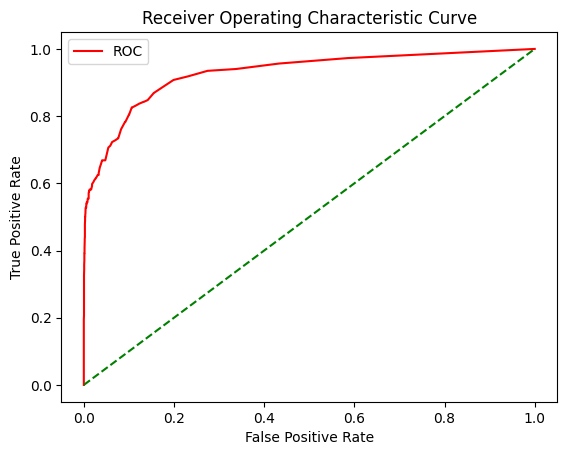

Feature importances
             BIOVAR1: 18.7
             BIOVAR2: 6.3
             BIOVAR3: 10.2
             BIOVAR7: 9.3
            BIOVAR13: 7.0
Cultivated_and_Managed_Vegetation: 4.3
Deciduous_Broadleaf_Trees: 3.3
Evergreen_Broadleaf_Trees: 5.4
Herbaceous_Vegetation: 1.0
   Mixed_Other_Trees: 2.2
          Open_Water: 0.3
Regularly_Flooded_Vegetation: 0.4
              Shrubs: 3.1
vegetacao_ibge1992_br: 3.1
        solos2001_br: 6.0
       sa2001tree_br: 4.8
        exposicao_br: 4.2
         density3_br: 5.4
      declividade_br: 4.9



c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ET
ET 5-fold Cross Validation Accuracy: 94.86 (+/- 0.96)

Accuracy Score: 0.97

Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2519
           1       0.93      0.59      0.72       184

    accuracy                           0.97      2703
   macro avg       0.95      0.79      0.85      2703
weighted avg       0.97      0.97      0.97      2703


Confusion matrix
[[2511    8]
 [  75  109]]

AUC(ROC): 0.79



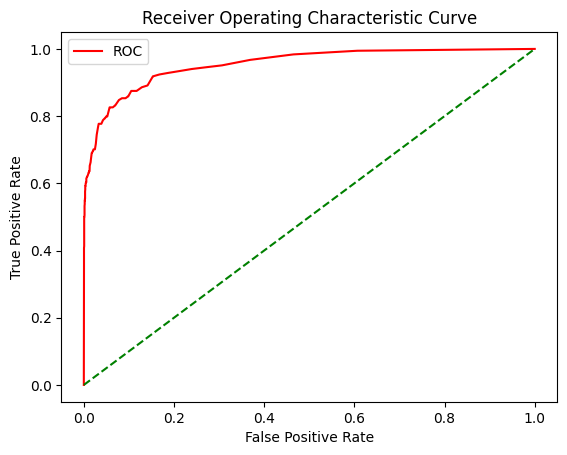

Feature importances
             BIOVAR1: 13.5
             BIOVAR2: 5.7
             BIOVAR3: 8.4
             BIOVAR7: 7.8
            BIOVAR13: 7.0
Cultivated_and_Managed_Vegetation: 6.0
Deciduous_Broadleaf_Trees: 4.5
Evergreen_Broadleaf_Trees: 5.3
Herbaceous_Vegetation: 1.5
   Mixed_Other_Trees: 3.4
          Open_Water: 0.6
Regularly_Flooded_Vegetation: 1.4
              Shrubs: 4.4
vegetacao_ibge1992_br: 4.6
        solos2001_br: 6.4
       sa2001tree_br: 5.9
        exposicao_br: 4.3
         density3_br: 4.9
      declividade_br: 4.3



c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


ADA


c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boostin

ADA 5-fold Cross Validation Accuracy: 93.64 (+/- 0.79)



c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2519
           1       0.74      0.35      0.48       184

    accuracy                           0.95      2703
   macro avg       0.85      0.67      0.73      2703
weighted avg       0.94      0.95      0.94      2703


Confusion matrix
[[2496   23]
 [ 119   65]]

AUC(ROC): 0.67



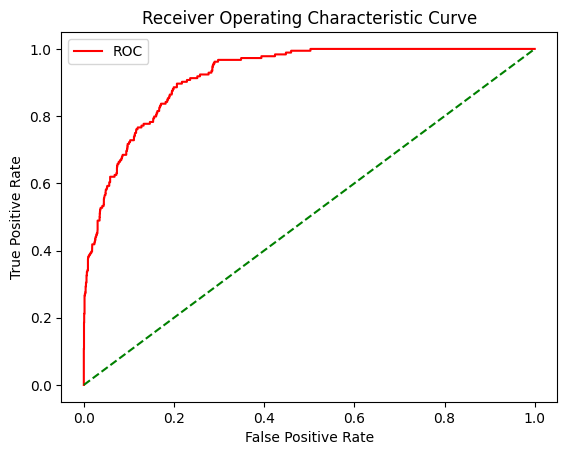

Feature importances
             BIOVAR1: 18.0
             BIOVAR2: 2.0
             BIOVAR3: 16.0
             BIOVAR7: 8.0
            BIOVAR13: 2.0
Cultivated_and_Managed_Vegetation: 6.0
Deciduous_Broadleaf_Trees: 2.0
Evergreen_Broadleaf_Trees: 2.0
Herbaceous_Vegetation: 4.0
   Mixed_Other_Trees: 2.0
          Open_Water: 0.0
Regularly_Flooded_Vegetation: 0.0
              Shrubs: 0.0
vegetacao_ibge1992_br: 2.0
        solos2001_br: 16.0
       sa2001tree_br: 6.0
        exposicao_br: 2.0
         density3_br: 4.0
      declividade_br: 8.0



c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


BAG
BAG 5-fold Cross Validation Accuracy: 95.00 (+/- 0.65)

Accuracy Score: 0.96

Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2519
           1       0.83      0.46      0.59       184

    accuracy                           0.96      2703
   macro avg       0.89      0.73      0.78      2703
weighted avg       0.95      0.96      0.95      2703


Confusion matrix
[[2501   18]
 [  99   85]]

AUC(ROC): 0.73



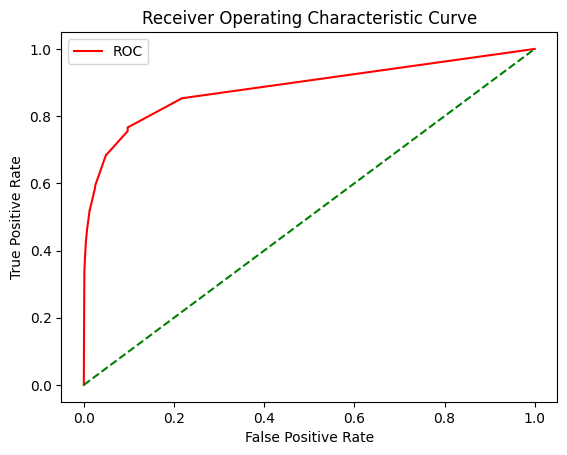

c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


GRA
GRA 5-fold Cross Validation Accuracy: 94.27 (+/- 0.63)

Accuracy Score: 0.95

Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2519
           1       0.79      0.44      0.56       184

    accuracy                           0.95      2703
   macro avg       0.87      0.72      0.77      2703
weighted avg       0.95      0.95      0.95      2703


Confusion matrix
[[2497   22]
 [ 103   81]]

AUC(ROC): 0.72



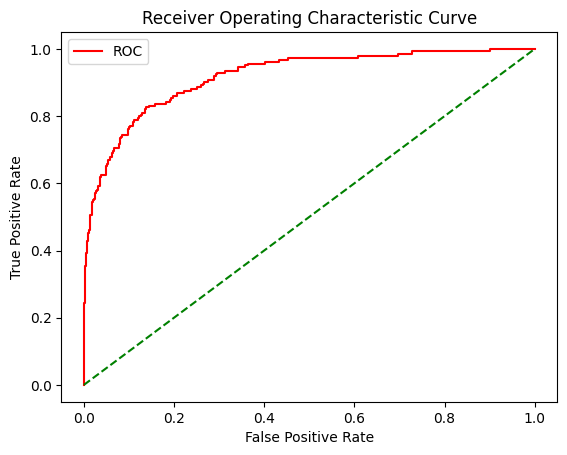

Feature importances
             BIOVAR1: 54.7
             BIOVAR2: 2.3
             BIOVAR3: 17.4
             BIOVAR7: 4.4
            BIOVAR13: 2.5
Cultivated_and_Managed_Vegetation: 2.0
Deciduous_Broadleaf_Trees: 0.9
Evergreen_Broadleaf_Trees: 3.7
Herbaceous_Vegetation: 0.3
   Mixed_Other_Trees: 0.2
          Open_Water: 0.6
Regularly_Flooded_Vegetation: 0.2
              Shrubs: 1.0
vegetacao_ibge1992_br: 1.1
        solos2001_br: 3.0
       sa2001tree_br: 2.2
        exposicao_br: 0.6
         density3_br: 1.9
      declividade_br: 1.0



c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


XGB
XGB 5-fold Cross Validation Accuracy: 95.24 (+/- 0.63)

Accuracy Score: 0.96

Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2519
           1       0.79      0.51      0.62       184

    accuracy                           0.96      2703
   macro avg       0.88      0.75      0.80      2703
weighted avg       0.95      0.96      0.95      2703


Confusion matrix
[[2495   24]
 [  91   93]]

AUC(ROC): 0.75



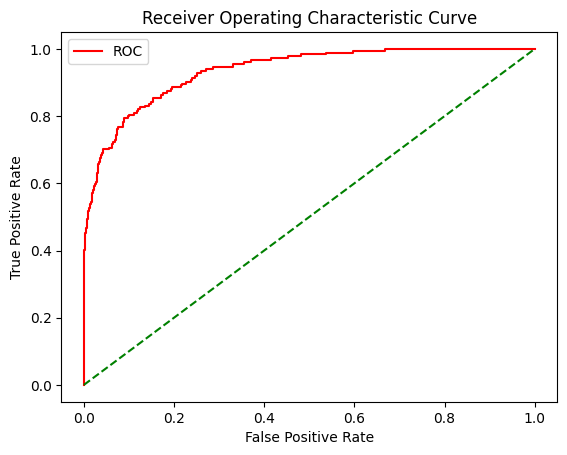

Feature importances
             BIOVAR1: 26.0
             BIOVAR2: 4.1
             BIOVAR3: 9.1
             BIOVAR7: 5.3
            BIOVAR13: 4.4
Cultivated_and_Managed_Vegetation: 4.6
Deciduous_Broadleaf_Trees: 2.3
Evergreen_Broadleaf_Trees: 5.8
Herbaceous_Vegetation: 3.1
   Mixed_Other_Trees: 2.9
          Open_Water: 3.3
Regularly_Flooded_Vegetation: 4.2
              Shrubs: 3.4
vegetacao_ibge1992_br: 3.6
        solos2001_br: 4.9
       sa2001tree_br: 3.5
        exposicao_br: 2.7
         density3_br: 4.0
      declividade_br: 2.6

LGBM
[LightGBM] [Info] Number of positive: 591, number of negative: 8057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2697
[LightGBM] [Info] Number of data points in the train set: 8648, number of used features: 19
[LightGBM] [Info] [binary:

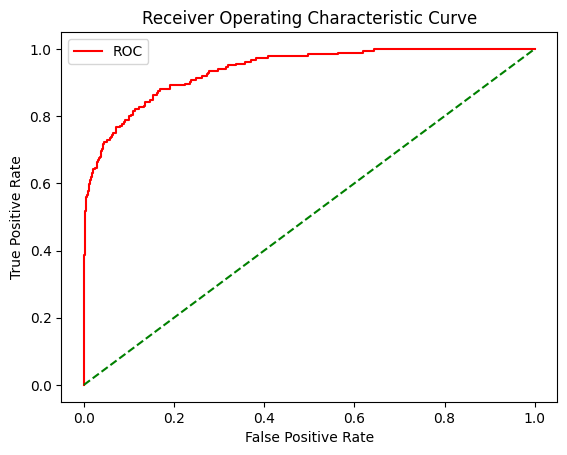

Feature importances
             BIOVAR1: 25400
             BIOVAR2: 21500
             BIOVAR3: 22200
             BIOVAR7: 22400
            BIOVAR13: 25000
Cultivated_and_Managed_Vegetation: 14100
Deciduous_Broadleaf_Trees: 8400
Evergreen_Broadleaf_Trees: 13400
Herbaceous_Vegetation: 4600
   Mixed_Other_Trees: 10200
          Open_Water: 700
Regularly_Flooded_Vegetation: 1200
              Shrubs: 10600
vegetacao_ibge1992_br: 7200
        solos2001_br: 23700
       sa2001tree_br: 17700
        exposicao_br: 22200
         density3_br: 27500
      declividade_br: 22000

Maxent


c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Maxent 5-fold Cross Validation Accuracy: 92.65 (+/- 0.88)

Accuracy Score: 0.94

Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2519
           1       0.75      0.28      0.41       184

    accuracy                           0.94      2703
   macro avg       0.85      0.64      0.69      2703
weighted avg       0.94      0.94      0.93      2703


Confusion matrix
[[2502   17]
 [ 132   52]]

AUC(ROC): 0.64



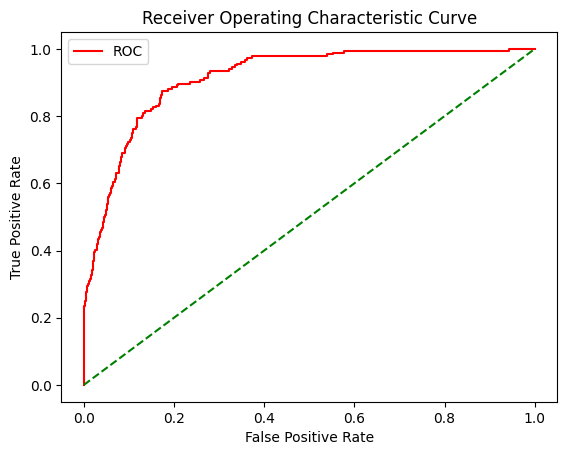

c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
for name, model in CLASS_MAP.items():
    evaluate_clf(model, X, y, name, k=5, test_size=0.2, scoring="f1_weighted", feature_names=X.columns)
    try:
        os.mkdir('../../data/OUTPUT/' + name + '-IMAGES')        
    except:
        pass 
    sdm_bio.output_model(model, tiff_output_files=tiff_files, output_dir='../../data/OUTPUT/' + name + '-IMAGES')

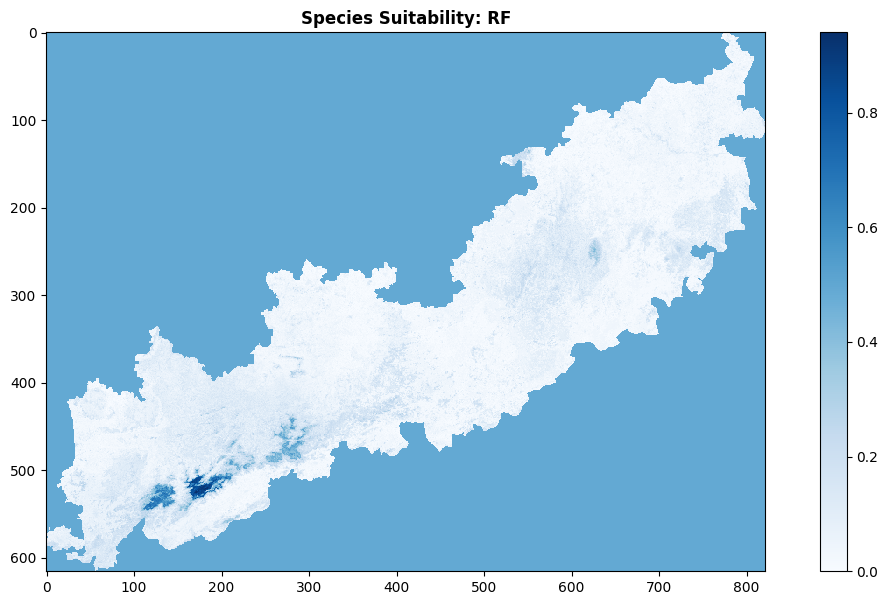

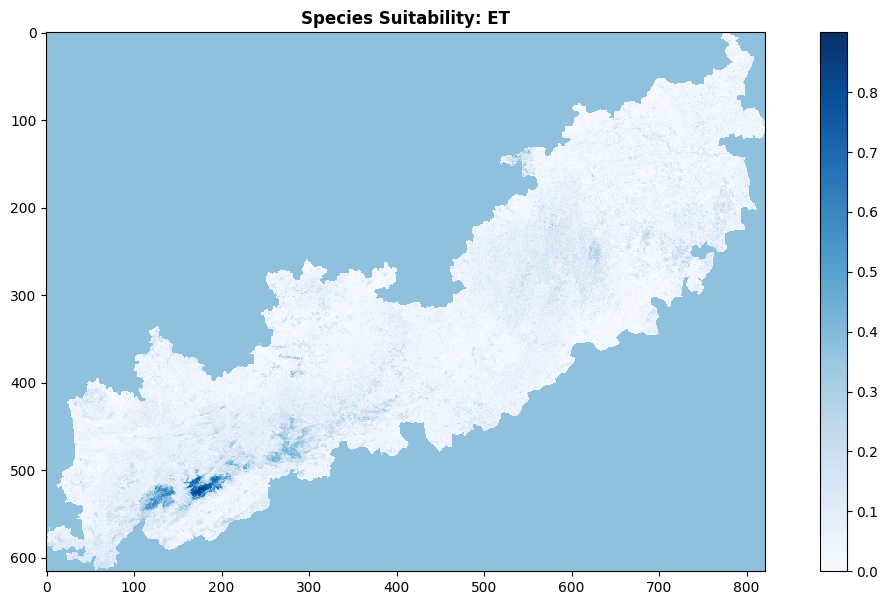

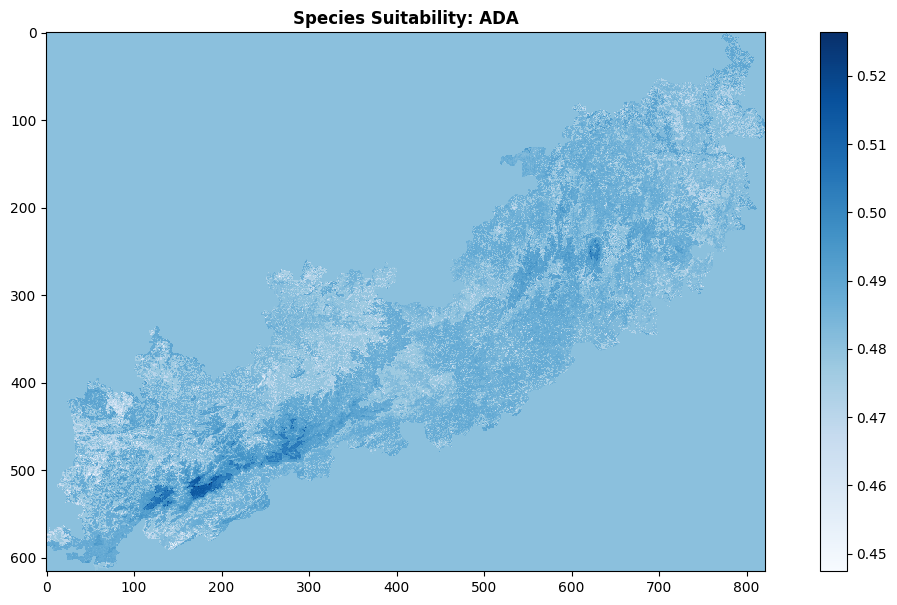

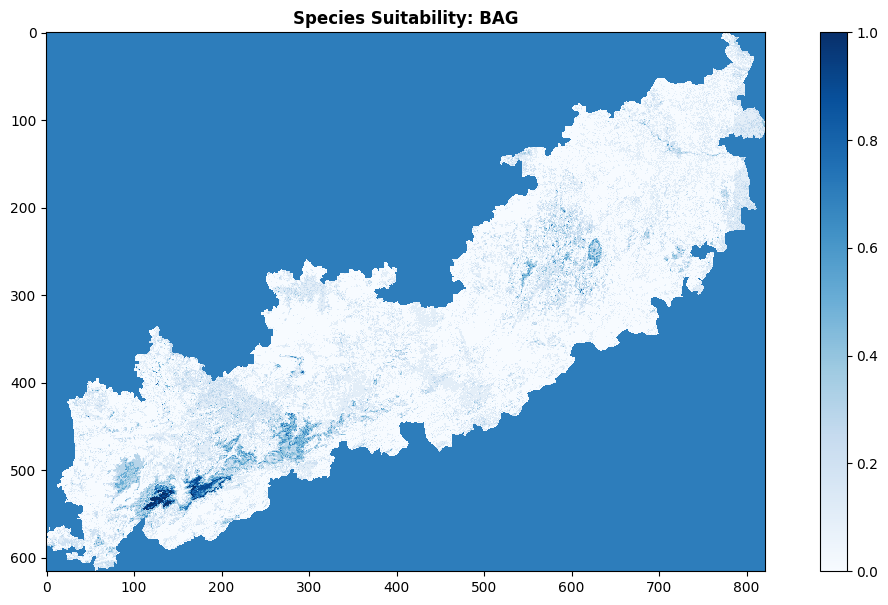

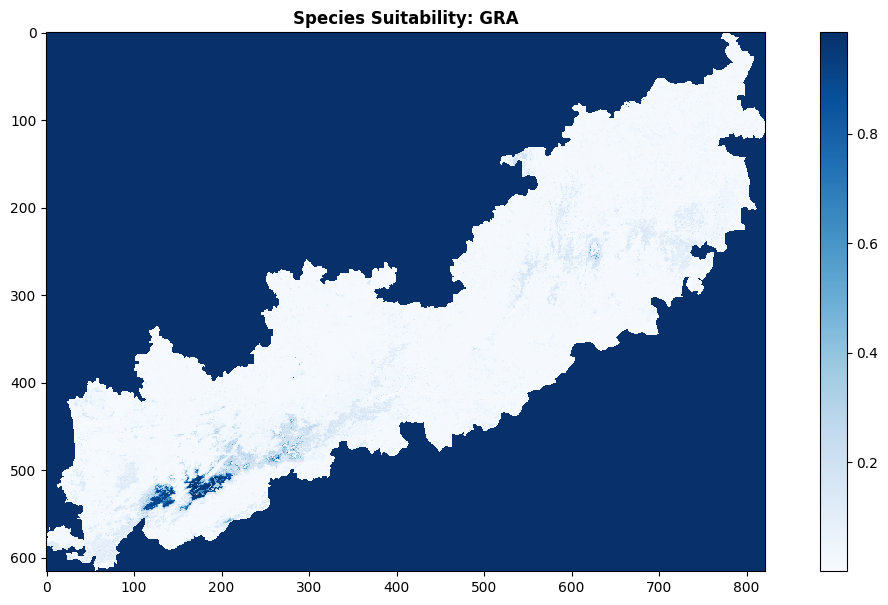

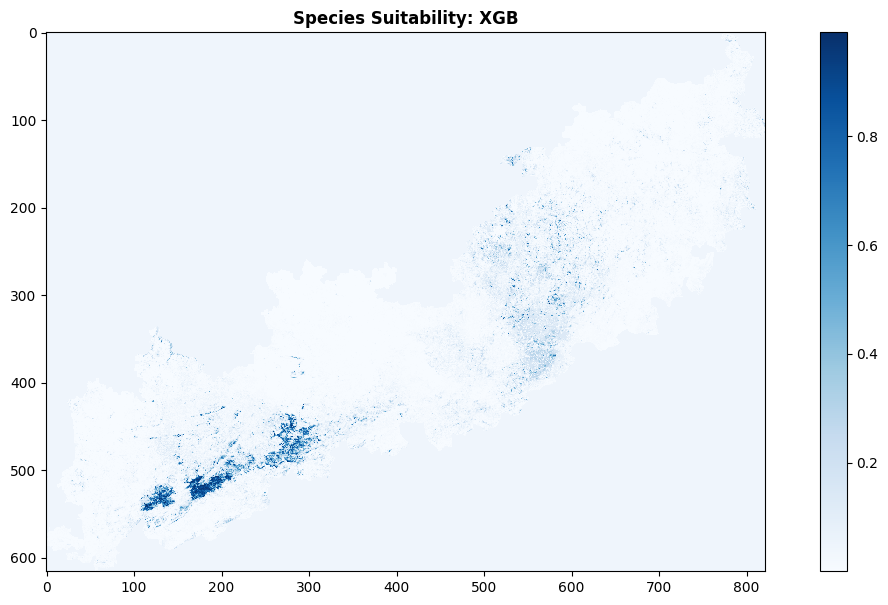

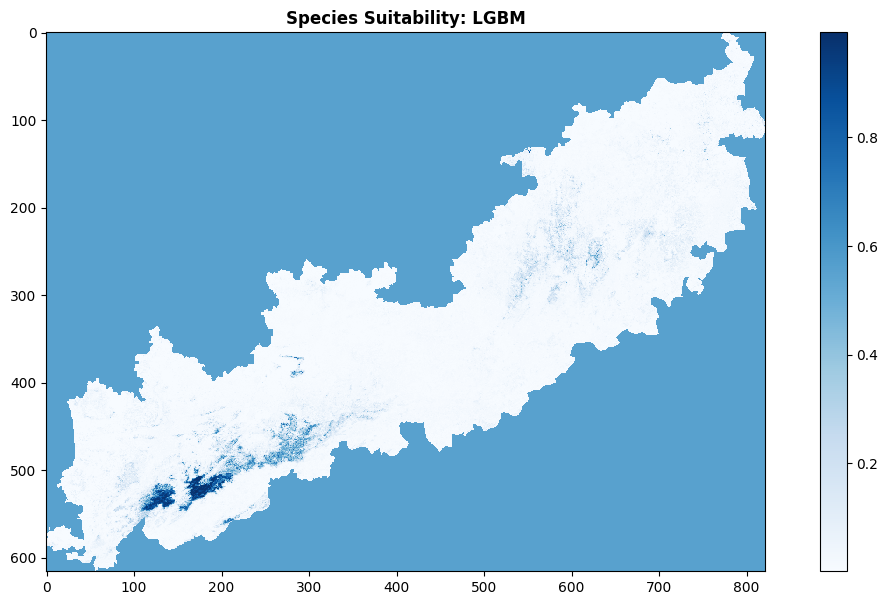

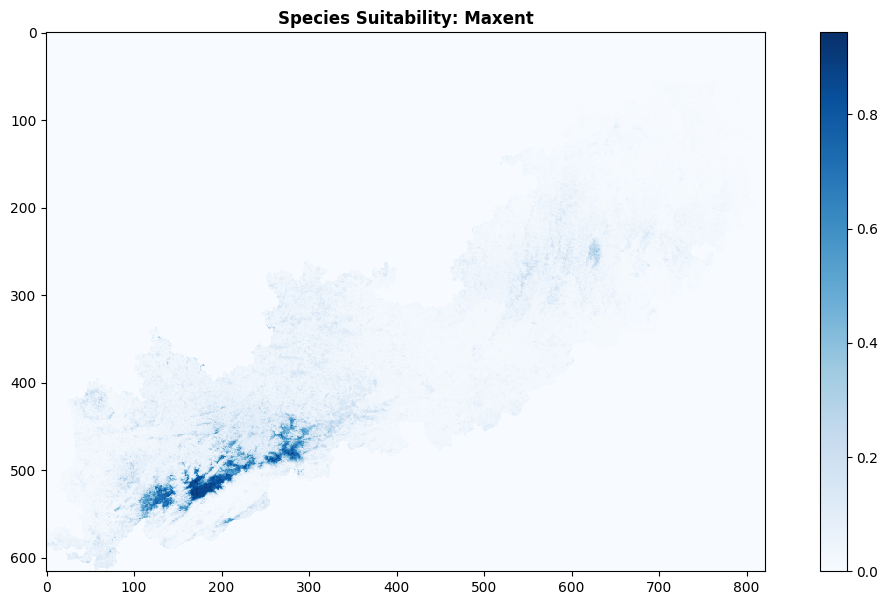

In [8]:
import matplotlib.pyplot as plt
import rasterio

for name, model in CLASS_MAP.items():
    f_path = '../../data/OUTPUT/' + name + '-IMAGES/' + 'probability_1.tif'
    
    with rasterio.open(f_path) as f:
        dist = f.read(1)
    sdm_bio.plotit(
        dist, f"Species Suitability: {name}", cmap="Blues"
    )
    plt.show()